### Question 1: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

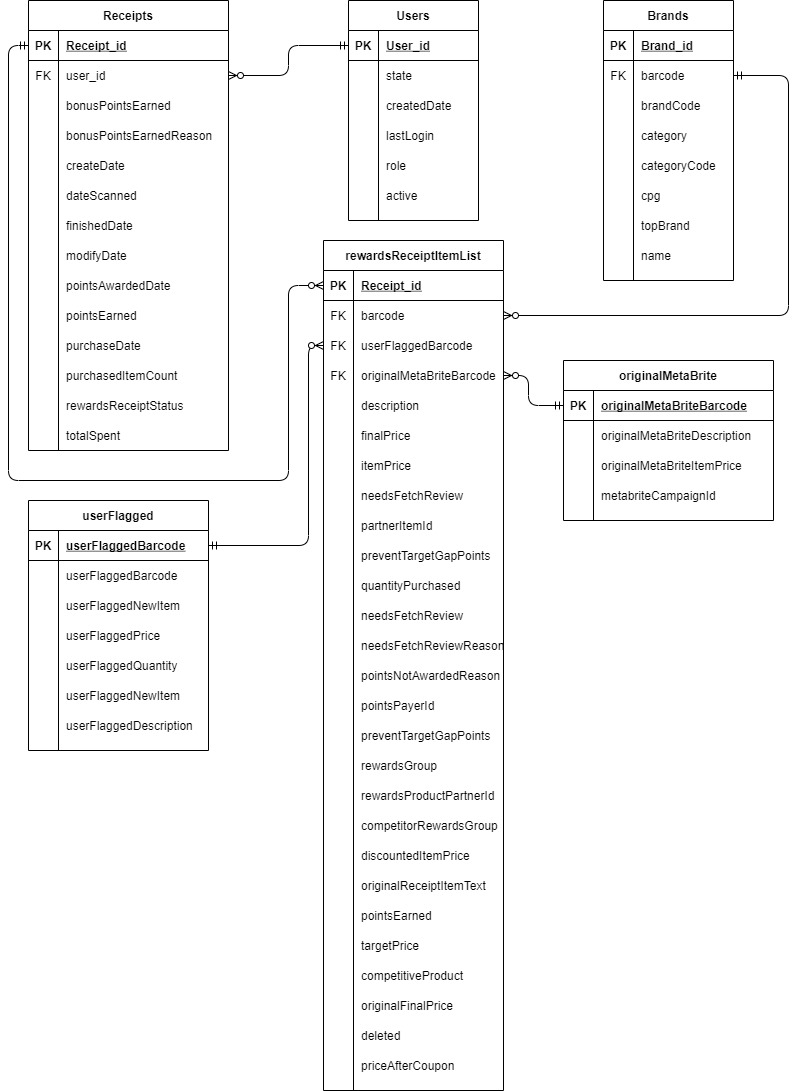

### Question 2: Write a query that directly answers a predetermined question from a business stakeholder

#### 2.1 What are the top 5 brands by receipts scanned for most recent month?
The following query will give us the value for most recent month along with the most recent year which can then be used to determine the top five brands.

SELECT MAX(strftime('%m %Y',ScannedDate)) FROM Receipts

Sample output:

03 2021

We can use this information to compute the top 5 brands for most recent month

SELECT b.brandCode,count(receipt_id) FROM Receipts r JOIN RewardsReceiptItemList rl ON r.reciept_id = rl.receipt_id JOIN brands b ON b.barcode = rl.barcode WHERE (strftime('%m %Y',ScannedDate)) = '03 2021' AND b.topBrand = "True" LIMIT 5;

The above query will give the top 5 brand in the most revent month.

#### 2.2 When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

The following two queries will give us the average spent for rewardsReceiptStatus "Accepted" and "Rejected" to see which one is greater.

SELECT AVG(totalSpent) FROM Receipts WHERE rewardsReceiptStatus = "Accepted";

SELECT AVG(totalSpent) FROM Receipts WHERE rewardsReceiptStatus = "Rejected";

On the basis of above two queries we can determine which one is greater.

#### 2.3 When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

With the following queries we can determine if the total number of items purchased with 'rewardsReceiptStatus’ of ‘Accepted’ is greater than that for 'rewardsReceiptStatus’ of ‘Rejected’,

SELECT SUM(purchasedItemCount) FROM Receipts WHERE rewardsReceiptStatus = "Accepted";

SELECT SUM(purchasedItemCount) FROM Receipts WHERE rewardsReceiptStatus = "Rejected";

With the outputs of above two queries we can determine the greater value.

In [188]:
# Importing libraries
import json
import pandas as pd
import datetime

# Reading users.json file
data=[]
for line in open('users.json', 'r'):
    data.append(json.loads(line))
    
# Converting read file to a dataframe
users=pd.DataFrame(data)

In [189]:
# Displaying the dataframe
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


In [190]:
# Converting the dates from asp.net format to a more widely accepte format
users['createdDate']=users['createdDate'].apply(lambda i: datetime.datetime.fromtimestamp(int(str(i['$date'])[:10])))
users['lastLogin'] = users['lastLogin'].apply(lambda i: str(i)[10:20] if(str(i)!=pd.np.nan) else "")
users['lastLogin'] = users['lastLogin'].apply(lambda i: datetime.datetime.fromtimestamp(int(i)) if(i!='') else '')

In [191]:
# Getting the most recent date
print(max(users['lastLogin']))

2021-03-05 10:52:23


In [192]:
# Dataframe after converting dates
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,2021-01-03 09:24:04,2021-01-03 09:25:37,consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,2021-01-03 09:24:04,2021-01-03 09:25:37,consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,2021-01-03 09:24:04,2021-01-03 09:25:37,consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,2021-01-03 09:25:30,2021-01-03 09:25:30,consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,2021-01-03 09:24:04,2021-01-03 09:25:37,consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,2014-12-19 08:21:22,2021-03-05 10:52:23,fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,2014-12-19 08:21:22,2021-03-05 10:52:23,fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,2014-12-19 08:21:22,2021-03-05 10:52:23,fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,2014-12-19 08:21:22,2021-03-05 10:52:23,fetch-staff,NaN,NaN


In [193]:
# Checking the null values in the dataset
users.isna().sum()

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [194]:
# Checking duplicate values in the dataset
users['_id'].value_counts(dropna=False)

{'$oid': '54943462e4b07e684157a532'}    20
{'$oid': '5fc961c3b8cfca11a077dd33'}    20
{'$oid': '59c124bae4b0299e55b0f330'}    18
{'$oid': '5fa41775898c7a11a6bcef3e'}    18
{'$oid': '5ff5d15aeb7c7d12096d91a2'}    18
                                        ..
{'$oid': '60086978633aab121bb8c895'}     1
{'$oid': '600f35015edb782098e2ac1b'}     1
{'$oid': '6010be65a4b74c120bd19edc'}     1
{'$oid': '601c6887969c0b11f7d0c81f'}     1
{'$oid': '60074b996e64691717e8f11a'}     1
Name: _id, Length: 212, dtype: int64

In [195]:
# Reading brands.json file
data=[]
for line in open('brands.json', 'r'):
    data.append(json.loads(line))

# Converting read file to a dataframe
brands = pd.DataFrame(data)

In [196]:
# Displaying the dataframe
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,False,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,False,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,False,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,False,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,False,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin DotsÂ® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,False,LIPTON TEA Leaves


In [197]:
#Converting the nested dictionary to saparate columns in the dataframe
brands['cpgid']=brands['cpg'].apply(lambda i: i['$id'])
brands['cpgref']=brands['cpg'].apply(lambda i: i['$ref'])

In [198]:
# Checking the null values in the dataset
brands.isna().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
cpgid             0
cpgref            0
dtype: int64

In [199]:
# Reading receipts.json file
data=[]
for line in open('receipts.json', 'r'):
    data.append(json.loads(line))
    
# Converting read file to a dataframe
receipts = pd.DataFrame(data)

In [200]:
# Displaying the dataframe
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [201]:
# Checking the null values in the dataset
receipts.isna().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [202]:
# Creating a filtered (removing missing values) list to analyize the nested dictonary in receipts dataset
filtered = receipts['rewardsReceiptItemList'].dropna()

In [203]:
# Displaying the dataset
filtered

0       [{'barcode': '4011', 'description': 'ITEM NOT ...
1       [{'barcode': '4011', 'description': 'ITEM NOT ...
2       [{'needsFetchReview': False, 'partnerItemId': ...
3       [{'barcode': '4011', 'description': 'ITEM NOT ...
4       [{'barcode': '4011', 'description': 'ITEM NOT ...
                              ...                        
1106    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1112    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1113    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1114    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1117    [{'barcode': 'B076FJ92M4', 'description': 'mue...
Name: rewardsReceiptItemList, Length: 679, dtype: object

In [204]:
# Preprocessing the dataset to easily perform analysis
data=[]
filtered.apply(lambda i: data.append(i))

intermediate_df=[]
for each in data:
    for i in each:
        intermediate_df.append(i)
        
nested_df= pd.DataFrame(intermediate_df)

In [205]:
# Displaying the dataset
nested_df

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
6937,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
6938,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
6939,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN


In [206]:
# Checking the null values in the dataset
nested_df.isna().sum()

barcode                               3851
description                            381
finalPrice                             174
itemPrice                              174
needsFetchReview                      6128
partnerItemId                            0
preventTargetGapPoints                6583
quantityPurchased                      174
userFlaggedBarcode                    6604
userFlaggedNewItem                    6618
userFlaggedPrice                      6642
userFlaggedQuantity                   6642
needsFetchReviewReason                6722
pointsNotAwardedReason                6601
pointsPayerId                         5674
rewardsGroup                          5210
rewardsProductPartnerId               4672
userFlaggedDescription                6736
originalMetaBriteBarcode              6870
originalMetaBriteDescription          6931
brandCode                             4341
competitorRewardsGroup                6666
discountedItemPrice                   1172
originalRec

As is visible from the analysis performed above, there are a lot of missing values in the datasets provided.

For the Users dataset:

lastlogin has 62 missing values.
signUpSource has 48 missing values. 
state has 56 missing values.

The missing data in this dataset is not a lot as compare to 495 observation in the dataset, however, there is no plausible way to estimate these missing values. Another issue is the duplicity of user ids in the dataset that will pose problems when storing the data in a relational database. More context on existence of duplicate values will help better store this data without losing information.

For the Brands dataset:

category has 155 missing values.
categoryCode has 650 missing values.
topBrand has 612 missing values.
brandCode has 234 missing values.

Again, as compared to 1167 observation the missing data may not be a lot but we can estimate or manually annotate these missing values and make this dataset more consistent.

For Receipts dataset:

A lot of observations in this dataset lack essential information. The dataset is not very consistent and may be improved by manually annotating or estimating the missing values. The nested dataset here, i.e. rewardsReceiptItemList, which has information related to the items purchased has an abundance of messing values. As compared to 6941 total observations within the dataset, columns like needsFetchReview, competitorRewardsGroup, itemNumber, originalFinalPrice, originalMetaBriteItemPrice among others have very few recorded values and therefore it makes the dataset inconsistent. Having more context on these attributes can help estimate the values or eliminate the unnecessary attributes.

### Question 4: Write a short email or Slack message to the business stakeholder

Hello Sam,

Hope you are having a nice day!

I wanted to reach out to you as I had a the chance to look at the data you provided. I did some initial analysis on the corpus and following are the issues I came across.

1) The date format of the corpus is inconsistent with the usual industry standards. This renders the date incompatible with multiple softwares so I had to explicitly convert the format to the most compatible one. Therefore, I would suggest you to ask your team to store the data in a more widely accepted format.
2) I also came across a lot of missing values in the data and the fact that the user ids are repeated in the data corpus can pose problems as user ids need to be unique to each user.
3) The receipts dataset has some information regrading the items included in the receipts, which is stores as rewardsReceiptItemList, but most of these values are missing and making it harder to understand the significance of it and thereby barring us from taking an appropriate action.

To resolve these issues I need more clarity on the significance of each column, and the reason for having blank values. This will help me understand how to artificially balance the data and compute values for data analysis and modeling if needed. Therefore, I request you to provide me with some more insights on the approach you've taken to store this information in order to improve the data processing down the lane.

I have attached a file that details the issues found in the data for your reference. Looking forward to hearing from you.

Thanks,
Kaushal Mamgain